In [1]:
import pandas as pd 

In [2]:
import numpy as np 

In [3]:
data = pd.read_csv('MTA_Bus_Ridership.csv')

## Loading the data into Python

In [5]:
print(data.head())

        transit_timestamp bus_route payment_method  \
0  06/08/2023 04:00:00 PM       B46      metrocard   
1  06/08/2023 04:00:00 AM      BX15      metrocard   
2  06/08/2023 10:00:00 PM      BX15      metrocard   
3  06/08/2023 08:00:00 AM      BX16      metrocard   
4  06/08/2023 02:00:00 PM      BX17      metrocard   

            fare_class_category  ridership  transfers  
0         Metrocard - Fair Fare     37.006      5.998  
1  Metrocard - Unlimited 30-Day      3.002      0.000  
2  Metrocard - Unlimited 30-Day     12.052      0.000  
3   Metrocard - Unlimited 7-Day     47.987      0.000  
4          Metrocard - Students      8.004      2.001  


In [6]:
# Checking for missing values
print(data.isnull().sum())

transit_timestamp      0
bus_route              0
payment_method         0
fare_class_category    0
ridership              8
transfers              2
dtype: int64


In [7]:
# Filling in missing values of ridership and transfers 
data['ridership'] = data['ridership'].fillna(data['ridership'].mean())
data['transfers'] = data['transfers'].fillna(data['transfers'].mean())

In [8]:
print(data.isnull().sum())

transit_timestamp      0
bus_route              0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
dtype: int64


# Exploratory Data Analysis (EDA)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

## Group-Wise Visualizations

### Created a stacked bar plot to show the proportion of payment methods (MetroCard vs. OMNY) for the Top 10 Bus Routes

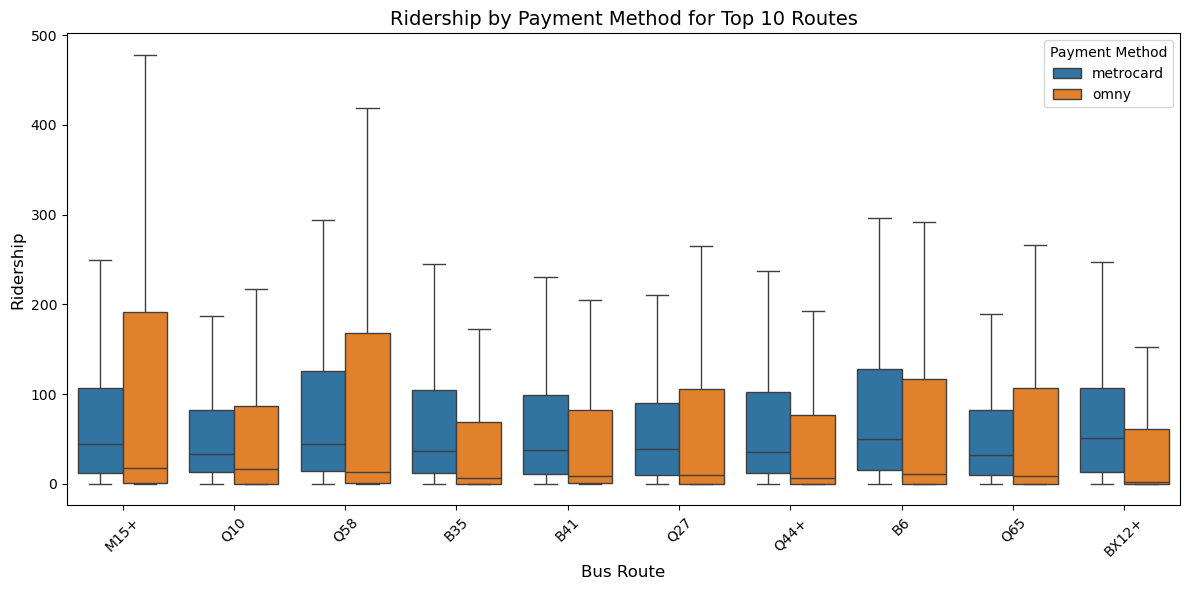

In [13]:
top_routes = data.groupby('bus_route')['ridership'].sum().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='bus_route', 
    y='ridership', 
    data=data[data['bus_route'].isin(top_routes)],
    hue='payment_method',
    showfliers=False 
)
plt.title("Ridership by Payment Method for Top 10 Routes", fontsize=14)
plt.xlabel("Bus Route", fontsize=12)
plt.ylabel("Ridership", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Payment Method", loc='upper right')
plt.tight_layout()
plt.show()

## Key Observations 

Proportional Differences: 

- For some routes, like the M15+, OMNY dominates as a payment method, reflecting its popularity and convenience on routes with high ridership 

- Other routes, such as the B35 or Q58, may have a higher proportion of MetroCard usage, suggesting a lag of OMNY adoption or a preference for MetroCard's among certain rider demographics 

Variation Across Routes: 

- The Distribution of payment methods can highlight the adoption rate of OMNY vs MetroCard. For example, a route with a significant OMNY share could indicate a higher percentage of tech-savvy riders or better OMNY infrastructure.  

- On the other hand, a route where MetroCard predominates could indicate a lack of OMNY access points or opposition to switching to the new system. 

Policy and Infrastructure Implications: 

- Targeted awareness campaigns or infrastructure improvements, like more OMNY readers at stops, may be necessary for routes with low OMNY adoption. 

Ridership Trends: 

- Insights such as whether high ridership routes prefer one payment method over another could be obtained by combining this data with ridership volumes. 

## Temporal Trends: to analyze hourly ridership for the top routes, I will plot line charts will reveal peak ridership times 

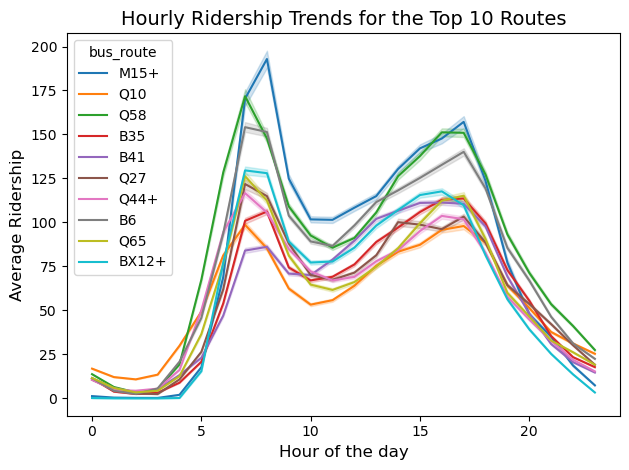

In [16]:
# Creating a new column for the hour of day
data['hour'] = pd.to_datetime(data['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p').dt.hour

#plotting hourly ridership trends
sns.lineplot(
    x='hour',
    y='ridership',
    hue='bus_route',
    data=data[data['bus_route'].isin(top_routes)],
    palette='tab10'
)
plt.title("Hourly Ridership Trends for the Top 10 Routes", fontsize=14)
plt.xlabel("Hour of the day", fontsize=12)
plt.ylabel("Average Ridership", fontsize=12)
plt.tight_layout()
plt.show()

## Importing Meteostat from Python's Weather API

In [18]:
pip install meteostat

Note: you may need to restart the kernel to use updated packages.


In [19]:
from meteostat import Hourly, Stations
from datetime import datetime

# New York City Coordinates 
latitude, longitude = 40.7128, -74.0060

# Getting nearby weather stations 
stations = Stations()
nearby_stations = stations.nearby(latitude, longitude)
station = nearby_stations.fetch(1) 
print("Selected Station:\n", station)

# Defining the time range 
start = datetime(2024, 1, 1)
end = datetime(2024, 12, 8)

# Fetching hourly data for the selected station
data = Hourly(station, start, end)
data = data.fetch()

# Displays the data 
print("Hourly Weather Data:")
print(data)

Selected Station:
                          name country region   wmo  icao  latitude  longitude  \
id                                                                              
KJRB0  New York / Wall Street      US     NY  <NA>  KJRB   40.7012    -74.009   

       elevation          timezone hourly_start hourly_end daily_start  \
id                                                                       
KJRB0        2.0  America/New_York   2016-07-20 2024-12-14  2016-07-21   

       daily_end monthly_start monthly_end     distance  
id                                                       
KJRB0 2022-04-24    2019-01-01  2021-01-01  1314.415384  
Hourly Weather Data:
                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2024-01-01 00:00:00   6.0  -1.9  57.0   0.0   NaN  260.0  11.0   NaN  1017.0   
2024-01-01 01:00:00   5.6  -2.3  57.0   0.0   NaN  260.0  11.2   NaN  1016.4   

### Saving Data for Further Analysis 

In [21]:
data.to_csv("Hourly_weather_data.csv")
print("Data saved to hourly_weather_data.csv")

Data saved to hourly_weather_data.csv


## Plotting Data to visualize key metrics like temperature or precipitation 

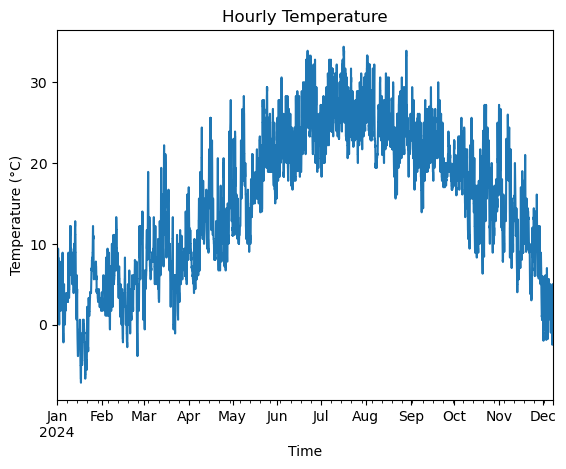

In [23]:
import matplotlib.pyplot as plt

data['temp'].plot(title="Hourly Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.show()

# Im going to merge the dataframes of hourly_weather_data.csv with my MTA Bus Ridership for better analysis

In [25]:
import pandas as pd 

# loading MTA ridership data 
mta_df = pd.read_csv("MTA_Bus_Ridership.csv")
# loading weather data 
weather_df = pd.read_csv("Hourly_weather_data.csv")
# Parsing datetime columns 
mta_df['datetime'] = pd.to_datetime(mta_df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')
weather_df['datetime'] = pd.to_datetime(weather_df['time'], errors='coerce') 
# Merging the two dataframes togeather on 'datetime'
merged_df = pd.merge(mta_df, weather_df, on='datetime', how='left')
# Checks the merged dataframe
print(merged_df.head())

        transit_timestamp bus_route payment_method  \
0  06/08/2023 04:00:00 PM       B46      metrocard   
1  06/08/2023 04:00:00 AM      BX15      metrocard   
2  06/08/2023 10:00:00 PM      BX15      metrocard   
3  06/08/2023 08:00:00 AM      BX16      metrocard   
4  06/08/2023 02:00:00 PM      BX17      metrocard   

            fare_class_category  ridership  transfers            datetime  \
0         Metrocard - Fair Fare     37.006      5.998 2023-06-08 16:00:00   
1  Metrocard - Unlimited 30-Day      3.002      0.000 2023-06-08 04:00:00   
2  Metrocard - Unlimited 30-Day     12.052      0.000 2023-06-08 22:00:00   
3   Metrocard - Unlimited 7-Day     47.987      0.000 2023-06-08 08:00:00   
4          Metrocard - Students      8.004      2.001 2023-06-08 14:00:00   

  time  temp  dwpt  rhum  prcp  snow  wdir  wspd  wpgt  pres  tsun  coco  
0  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

In [26]:
import pandas as pd 

#Filer mta_df to match the datetime range of weather_df
mta_df = mta_df[(mta_df['datetime'] >= '2024-01-01 00:00:00') & (mta_df['datetime'] <= '2024-12-03 00:00:00')]
#Merged the filtered mta_df with weather_df
merged_df = pd.merge(mta_df, weather_df, on='datetime', how='left')
#Checking the merged dataframe 
print(merged_df.head())
print(merged_df.isna().sum())

        transit_timestamp bus_route payment_method  \
0  04/22/2024 02:00:00 AM       B52           omny   
1  04/22/2024 09:00:00 PM       B52           omny   
2  04/22/2024 05:00:00 PM       B54      metrocard   
3  04/22/2024 07:00:00 AM       B54      metrocard   
4  04/22/2024 09:00:00 AM       B60      metrocard   

            fare_class_category  ridership  transfers            datetime  \
0              OMNY - Full Fare      1.000      1.000 2024-04-22 02:00:00   
1                  OMNY - Other      0.020      0.000 2024-04-22 21:00:00   
2         Metrocard - Full Fare     70.004     18.004 2024-04-22 17:00:00   
3  Metrocard - Unlimited 30-Day     34.014      0.000 2024-04-22 07:00:00   
4             Metrocard - Other      0.012      0.000 2024-04-22 09:00:00   

                  time  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0  2024-04-22 02:00:00   9.4  -2.9  42.0   0.0   NaN    0.0   0.0   NaN   
1  2024-04-22 21:00:00  17.2  -3.0  25.0   0.0   NaN  320.0   

### Handling Missing Values 

In [28]:
merged_df['prcp'] = merged_df['prcp'].fillna(0)
merged_df['snow'] = merged_df['snow'].fillna(0)
merged_df['temp'] = merged_df['temp'].fillna(merged_df['temp'].mean())
print(merged_df[merged_df['ridership'].isna()])

               transit_timestamp bus_route payment_method  \
4583105   08/08/2024 12:00:00 PM      M86+      metrocard   
10277101  10/12/2024 03:00:00 AM      M86+      metrocard   
11236457  03/04/2024 12:00:00 AM      M86+      metrocard   
13581339  05/22/2024 11:00:00 PM      M79+      metrocard   

                  fare_class_category  ridership  transfers  \
4583105          Metrocard - Students        NaN        NaN   
10277101  Metrocard - Unlimited 7-Day        NaN        0.0   
11236457        Metrocard - Fair Fare        NaN        0.0   
13581339            Metrocard - Other        NaN        0.0   

                    datetime                 time  temp  dwpt  rhum  prcp  \
4583105  2024-08-08 12:00:00  2024-08-08 12:00:00  20.6  18.4  87.0   0.0   
10277101 2024-10-12 03:00:00  2024-10-12 03:00:00  17.2   6.1  48.0   0.0   
11236457 2024-03-04 00:00:00  2024-03-04 00:00:00  15.0   7.8  62.0   0.0   
13581339 2024-05-22 23:00:00  2024-05-22 23:00:00  24.4  16.1  60.0   

In [29]:
### Checking for Specific Columns with NaN

In [30]:
missing_ridership = merged_df[merged_df['ridership'].isna()]
print(missing_ridership)

               transit_timestamp bus_route payment_method  \
4583105   08/08/2024 12:00:00 PM      M86+      metrocard   
10277101  10/12/2024 03:00:00 AM      M86+      metrocard   
11236457  03/04/2024 12:00:00 AM      M86+      metrocard   
13581339  05/22/2024 11:00:00 PM      M79+      metrocard   

                  fare_class_category  ridership  transfers  \
4583105          Metrocard - Students        NaN        NaN   
10277101  Metrocard - Unlimited 7-Day        NaN        0.0   
11236457        Metrocard - Fair Fare        NaN        0.0   
13581339            Metrocard - Other        NaN        0.0   

                    datetime                 time  temp  dwpt  rhum  prcp  \
4583105  2024-08-08 12:00:00  2024-08-08 12:00:00  20.6  18.4  87.0   0.0   
10277101 2024-10-12 03:00:00  2024-10-12 03:00:00  17.2   6.1  48.0   0.0   
11236457 2024-03-04 00:00:00  2024-03-04 00:00:00  15.0   7.8  62.0   0.0   
13581339 2024-05-22 23:00:00  2024-05-22 23:00:00  24.4  16.1  60.0   

In [31]:
# Dropping columns with any NaN Values 
merged_df = merged_df.dropna(axis=1, how='all')
print(merged_df)

               transit_timestamp bus_route payment_method  \
0         04/22/2024 02:00:00 AM       B52           omny   
1         04/22/2024 09:00:00 PM       B52           omny   
2         04/22/2024 05:00:00 PM       B54      metrocard   
3         04/22/2024 07:00:00 AM       B54      metrocard   
4         04/22/2024 09:00:00 AM       B60      metrocard   
...                          ...       ...            ...   
17765425  02/02/2024 01:00:00 PM       Q72      metrocard   
17765426  02/02/2024 11:00:00 AM       Q72           omny   
17765427  02/02/2024 08:00:00 AM       Q76      metrocard   
17765428  02/02/2024 10:00:00 AM       Q76           omny   
17765429  02/02/2024 07:00:00 AM       Q77           omny   

                   fare_class_category  ridership  transfers  \
0                     OMNY - Full Fare      1.000      1.000   
1                         OMNY - Other      0.020      0.000   
2                Metrocard - Full Fare     70.004     18.004   
3         M

# Engineering Relevent Features such as Temporal variables (Days of week, seasonality) and environmental factors like temperature and precipitation

## Temporal Values

In [34]:
# Day of the week 
merged_df['day_of_week'] = merged_df['datetime'].dt.dayofweek
# Hour of the day
merged_df['hour_of_day'] = merged_df['datetime'].dt.hour
# Month 
merged_df['month'] = merged_df['datetime'].dt.month
# Assigning a season based on month
def assign_season(month):
    if month is [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
# Season 
merged_df['season'] = merged_df['month'].apply(assign_season)

## Environmental Features

In [36]:
# Catagoricalizing temperature into varaibles directly 

In [37]:
merged_df['temp_category'] = pd.cut(merged_df['temp'], bins=[-float('inf'), 10, 20, 30, float('inf')], labels=['Cold', 'Mild', 'Warm', 'Hot'])

In [38]:
# Catagoricalizing Prepitation (Rain/Snow)
merged_df['is_rainy'] = (merged_df['prcp'] > 0).astype(int) # 1 for rain, otherwise its 0
merged_df['is_snow'] = (merged_df['snow'] > 0).astype(int) # 1 for snow, otherwise its 0

In [39]:
# Catagoricalizing Humidity
merged_df['humidity_level'] = pd.cut(merged_df['rhum'], bins=[-float('inf'), 30, 60, 90, float('inf')], labels=['Low', 'Moderate', 'High', 'Very High'])

### Holiday Indicator - holidays may signify impact of ridership patterns. To check if a date is a holiday, I created a binary featue (1 for holiday, 0 for non-holiday)

In [41]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar() 
holidays = cal.holidays(start=merged_df['datetime'].min(), end=merged_df['datetime'].max())
merged_df['is_holiday'] = merged_df['datetime'].dt.date.isin(holidays).astype(int)

In [42]:
# Convering 'datetime' column to pandads 'datetime' type 
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Engineered features put togeather 
merged_df['day_of_week'] = merged_df['datetime'].dt.dayofweek
merged_df['hour_of_day'] = merged_df['datetime'].dt.hour
merged_df['month'] = merged_df['datetime'].dt.month

# Assigned Season 
merged_df['season'] = merged_df['month'].apply(assign_season)

# Environmental Features put togeather 
merged_df['temp_category'] = pd.cut(merged_df['temp'], bins=[-float('inf'), 10, 20, 30, float('inf')], labels=['Cold', 'Mild', 'Warm', 'Hot'])
merged_df['is_rainy'] = (merged_df['prcp'] > 0).astype(int)
merged_df['is_snowy'] = (merged_df['snow'] > 0).astype(int)
merged_df['humidity_level'] = pd.cut(merged_df['rhum'], bins=[-float('inf'), 30, 60, 90, float('inf')], labels=['Low', 'Moderate', 'High', 'Very High'])

# Holiday Feature
merged_df['is_holiday'] = merged_df['datetime'].dt.date.isin(holidays).astype(int)

# Normalizing Data 

In [44]:
from sklearn.preprocessing import StandardScaler 

# Selecting numerical columns to scale 
numerical_columns = ['temp', 'prcp', 'snow', 'rhum', 'transfers', 'ridership']
# Standard Scaling (mean=0, std=1)
scaler = StandardScaler()
merged_df[numerical_columns] = scaler.fit_transform(merged_df[numerical_columns])
print(merged_df.head())

        transit_timestamp bus_route payment_method  \
0  04/22/2024 02:00:00 AM       B52           omny   
1  04/22/2024 09:00:00 PM       B52           omny   
2  04/22/2024 05:00:00 PM       B54      metrocard   
3  04/22/2024 07:00:00 AM       B54      metrocard   
4  04/22/2024 09:00:00 AM       B60      metrocard   

            fare_class_category  ridership  transfers            datetime  \
0              OMNY - Full Fare  -0.450736  -0.234186 2024-04-22 02:00:00   
1                  OMNY - Other  -0.476715  -0.341434 2024-04-22 21:00:00   
2         Metrocard - Full Fare   1.378509   1.589461 2024-04-22 17:00:00   
3  Metrocard - Unlimited 30-Day   0.424441  -0.341434 2024-04-22 07:00:00   
4             Metrocard - Other  -0.476927  -0.341434 2024-04-22 09:00:00   

                  time      temp  dwpt  ...  day_of_week  hour_of_day  month  \
0  2024-04-22 02:00:00 -0.719007  -2.9  ...            0            2      4   
1  2024-04-22 21:00:00  0.152008  -3.0  ...         

# Performing One-Hot Encoding to double check columns like 'fare_class_category', 'bus_route', and 'payment_method' 

In [46]:
# One-hot encoding on the selected catagorical columns
categorical_columns = ['fare_class_category', 'bus_route', 'payment_method']
encoded_df = pd.get_dummies(merged_df, columns=categorical_columns, drop_first=True)

# Displays the first few rows of the updated df 
print(encoded_df.head())
# Checking if the new dimensions of the dataframe was added 
print("Original dataframe shape:", merged_df.shape)
print("Encoded dataframe shape:", encoded_df.shape)

        transit_timestamp  ridership  transfers            datetime  \
0  04/22/2024 02:00:00 AM  -0.450736  -0.234186 2024-04-22 02:00:00   
1  04/22/2024 09:00:00 PM  -0.476715  -0.341434 2024-04-22 21:00:00   
2  04/22/2024 05:00:00 PM   1.378509   1.589461 2024-04-22 17:00:00   
3  04/22/2024 07:00:00 AM   0.424441  -0.341434 2024-04-22 07:00:00   
4  04/22/2024 09:00:00 AM  -0.476927  -0.341434 2024-04-22 09:00:00   

                  time      temp  dwpt      rhum      prcp  snow  ...  \
0  2024-04-22 02:00:00 -0.719007  -2.9 -1.273657 -0.189465   0.0  ...   
1  2024-04-22 21:00:00  0.152008  -3.0 -2.238053 -0.189465   0.0  ...   
2  2024-04-22 17:00:00 -0.216498  -3.9 -2.011136 -0.189465   0.0  ...   
3  2024-04-22 07:00:00 -0.964678  -3.4 -0.990011 -0.189465   0.0  ...   
4  2024-04-22 09:00:00 -1.020512  -2.2 -0.649636 -0.189465   0.0  ...   

   bus_route_SIM8X  bus_route_SIM9  bus_route_X27  bus_route_X28  \
0            False           False          False          False  

### The encoding process appears to be successful however, the large number of additional columns (from 27 to 391) suggests a high cardinality in some of the categories, particularly in the 'bus_route'. 

In [48]:
# Checking column-wise sparsity 
sparsity = (encoded_df == 0).sum() / len(encoded_df)
print(sparsity[sparsity > 0.99])

snow                                    1.000000
is_snow                                 1.000000
is_holiday                              1.000000
is_snowy                                1.000000
fare_class_category_OMNY - Fair Fare    0.999724
                                          ...   
bus_route_X37                           0.997919
bus_route_X38                           0.997944
bus_route_X63                           0.997778
bus_route_X64                           0.998636
bus_route_X68                           0.998279
Length: 360, dtype: float64


### Aggregating the ridership data by route by summarizing the information and figuring out metrics like each route's average ridership, total ridership, or peak hours.

In [50]:
route_ridership_summary = merged_df.groupby('bus_route')['ridership'].mean().reset_index()
print(route_ridership_summary)

    bus_route  ridership
0          B1   0.856638
1        B100  -0.077176
2        B103   0.315499
3         B11   0.255673
4         B12   0.114171
..        ...        ...
351       X37  -0.345244
352       X38  -0.361468
353       X63  -0.412933
354       X64  -0.427306
355       X68  -0.416805

[356 rows x 2 columns]


### Then I'm going to use clustering algorithm to group routes that have similar ridership patterns 

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalizing the ridership and other relevant metrics 
route_ridership_summary = merged_df.groupby('bus_route')['ridership'].mean().reset_index()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(route_ridership_summary[['ridership']])

# Applyed K-Means for clustering to group routes
kmeans = KMeans(n_clusters=5, random_state=42)
route_ridership_summary['cluster'] = kmeans.fit_predict(scaled_features)

# Assigned each route to a cluster 
merged_df = merged_df.merge(route_ridership_summary[['bus_route', 'cluster']], on='bus_route', how='left')

print(merged_df[['bus_route', 'cluster']].drop_duplicates().head())

  bus_route  cluster
0       B52        2
2       B54        2
4       B60        1
6        B6        0
9       B57        2


In [53]:
# Analyzing Clusters 
cluster_summary = merged_df.groupby('cluster')['ridership'].agg(['mean', 'count'])
print(cluster_summary)

             mean    count
cluster                   
0        0.877677  1548496
1       -0.372830  5653677
2        0.268752  4663164
3       -0.129503  5777170
4        1.982659   122919


# Cluster Analysis 
- Cluster 0: 
     - Mean Ridership: 0.877677
     - Count: 1,548,496 routes
     - Interpretation: These routes exhibit an above average ridership. They could represent moderately popular bus routes.
- Cluster 1: 
     - Mean Ridership: -0.372830
     - Count: 5,653,677 routes
     - Interpretation: This cluster contains routes with below-average ridership. These routes might be less utilized and could benifit from adjustments in scheduling or capacity.
- Cluster 2: 
     - Mean Ridership: 0.268752 
     - Count: 4,663,164 routes
     - Interpretation: Routes in this cluster performs slightly above average. These routes might cater to places where demand is consistent but not very high.
- Cluster 3: 
     - Mean Ridership: -0.129503
     - Count: 5,777,170 routes
     - Interpretation: These routes also have a slightly below-average ridership as well, though it's better then cluster 1. Potential optimization exists here.
- Cluster 4: 
     - Mean Ridership: 1.982659
     - Count: 122,919 routes
     - Interpretation: This cluster, which represents the routes with the highest ridership, stands out. For service quality and growth, these routes should be given priority since they are essential for managing periods of high demand.

# Splitting Data for Training and Testing 

## Before applying machine learning, I'm going to split my dataset into training and testing subsets 

In [57]:
from sklearn.model_selection import train_test_split

# Separating the features and target
X = merged_df.drop(columns=['ridership']) 
y = merged_df['ridership'] # target

# Performing the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# prints the output shape 
print("Training Feature Shape:", X_train.shape)
print("Testing Feature Shape:", X_test.shape)
print("Training Feature Shape:", y_train.shape)
print("Training Feature Shape:", y_test.shape)

Training Feature Shape: (14212344, 27)
Testing Feature Shape: (3553086, 27)
Training Feature Shape: (14212344,)
Training Feature Shape: (3553086,)


# Testing & Training Analysis 
- Training Features (X_train): 14212344, 27
     - The training feautures of X has 14,212,344 training samples and 27 features per sample 
- Testing Features (X_test): 3553086, 27
     - The testing feautures of X has 3,553,086 training samples and 27 features per sample
- Training Labels (y_train): 14212344
     - The y train shows the target labels for the training set corresponds to the number of training samples
- Testing Labels (y_test): 3553086
     - The y test shows that the target labels for the testing set correspond to number of testing samples 

In [59]:
# Checking for missing values 
print(X_train.isnull().sum())

transit_timestamp           0
bus_route                   0
payment_method              0
fare_class_category         0
transfers                   1
datetime                    0
time                        0
temp                        0
dwpt                        0
rhum                        0
prcp                        0
snow                        0
wdir                    63642
wspd                        0
pres                        0
coco                   334653
day_of_week                 0
hour_of_day                 0
month                       0
season                      0
temp_category               0
is_rainy                    0
is_snow                     0
humidity_level              0
is_holiday                  0
is_snowy                    0
cluster                     0
dtype: int64


### When trying to train my model the first time, it ran into some issues and noticed that the following columns 'transfers', 'wdir'(wind direction), and 'coco'(Code for Conditions), contained missing values (NaN). Before proceding testing, I had to handle those issues. 

## Im going to impute the missing values using mean, median, most frequent value

In [1]:
from sklearn.impute import SimpleImputer

# Defining imputers 
mean_imputer = SimpleImputer(strategy='mean') # numerical data
mode_imputer = SimpleImputer(strategy='most_frequent') # categorical data x

# Applying imputers 
X_train['transfers'] = mean_imputer.fit_transform(X_train[['transfers']])
X_train['wdir'] = mean_imputer.fit_transform(X_train[['wdir']])
X_train['coco'] = mean_imputer.fit_transform(X_train[['coco']])

X_test['transfers'] = mean_imputer.fit_transform(X_test[['transfers']])
X_test['wdir'] = mean_imputer.fit_transform(X_test[['wdir']])
X_test['coco'] = mean_imputer.fit_transform(X_test[['coco']])

print(X_train.isnull().sum())
print(X_test.isnull().sum())

NameError: name 'X_train' is not defined

## Next, I'm going to run feature importance analysis using XGBoost to see which features have the most impact on ridership. This will help identify if wdir (wind direction) and coco (weather conditions) significantly influence the target variable.

In [64]:
# Checking Non-numerical Columns 
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-numerical columns:", non_numeric_columns)

Non-numerical columns: Index(['transit_timestamp', 'bus_route', 'payment_method',
       'fare_class_category', 'time', 'season'],
      dtype='object')


In [65]:
import pandas as pd
import numpy as np
import time
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

if 'datetime_y' in merged_df.columns:
    merged_df.drop(columns=['datetime_y'], inplace=True)
    print("'datetime_y' column dropped.")
else:
    print("'datetime_y' column not found. Skipping drop operation.")

print("Updated columns:", merged_df.columns.tolist())

# Encoding categorical variables using LabelEncoder
categorical_columns = ['bus_route', 'payment_method', 'fare_class_category', 'season']
label_encoder = LabelEncoder()
for col in categorical_columns:
    if col in merged_df.columns:
        merged_df[col] = label_encoder.fit_transform(merged_df[col].astype(str))
    else:
        print(f"Column '{col}' not found. Skipping encoding.")

# Converting 'datetime' column to numerical features 
if 'datetime' in merged_df.columns:
    merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])
    merged_df['year'] = merged_df['datetime'].dt.year
    merged_df['month'] = merged_df['datetime'].dt.month
    merged_df['day'] = merged_df['datetime'].dt.day
    merged_df['hour'] = merged_df['datetime'].dt.hour
    merged_df.drop(columns=['datetime'], inplace=True)  # Drops the original datetime column after conversion

# Defining the target and feature variables
X = merged_df.drop(columns=['ridership', 'transit_timestamp'])  # Dropped 'transit_timestamp' since it contained str data
y = merged_df['ridership']

X = X.select_dtypes(include=[np.number])  # Ensures that all features are numeric

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sampling the dataset for faster processing 
sample_size = 100000
if len(X_train) > sample_size:
    X_train = X_train.iloc[:sample_size]
    y_train = y_train.iloc[:sample_size]

# Normalizing the feature variables using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Impute missing values in X_train, X_test, and y_train
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Imputing missing values in y_train and y_test using median strategy
imputer_y = SimpleImputer(strategy="median")
y_train = imputer_y.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test = imputer_y.transform(y_test.values.reshape(-1,1)).ravel() # Imputing missing values in y_test

# Model 1: Linear Regression
print("\nEvaluating Linear Regression:")
try:
    start_time = time.time()
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train.ravel())  # Ensuring correct shape
    y_pred_lr = lr_model.predict(X_test)
    print("   MAE:", mean_squared_error(y_test, y_pred_lr))
    print("   R²:", r2_score(y_test, y_pred_lr))
    print("   Time taken", time.time() - start_time, "seconds")
except Exception as e:
    print("Error with Linear Regression:", e)

# Grid Search for Random Forest Parameter 
print("\nPerformance Grid Search for Random Forest...")
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_leaf': [1, 4]
}
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1 
)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
print("Best Random Forest Parameters:", rf_grid_search.best_params_)

# Model 2: Random Forest Regressor
print("\nEvaluating Random Forest Regressor:")
try:
    start_time = time.time()
    rf_model = best_rf_model
    # rf_model = RandomForestRegressor(random_state=42, n_estimators=50, max_depth=10, n_jobs=-1) # Reduced the capacity of RFR
    rf_model.fit(X_train, y_train.ravel())  # Ensuring correct shape
    y_pred_rf = rf_model.predict(X_test)
    print("   MAE:", mean_squared_error(y_test, y_pred_rf))
    print("   R²:", r2_score(y_test, y_pred_rf))
    print("   Time taken", time.time() - start_time, "seconds")
except Exception as e:
    print("Error with Random Forest Regressor:", e)

# Grid Search for XGBoost
print("\nPerformance Grid Search for XGBoost...")
param_grid_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6]
}
xgb_grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid_xgb,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
print("Best XGBoost Parameters:", xgb_grid_search.best_params_)

# Model 3: XGBoost Regressor
print("\nEvaluating XGBoost Regressor:")
try:
    start_time = time.time()
    # xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=50, learning_rate=0.1, n_jobs=-1) # Reduced the capacity of XGB
    xgb_model = best_rf_model
    xgb_model.fit(X_train, y_train.ravel())  # Ensuring correct shape
    y_pred_xgb = xgb_model.predict(X_test)
    print("   MAE:", mean_squared_error(y_test, y_pred_xgb))
    print("   R²:", r2_score(y_test, y_pred_xgb))
    print("   Time taken", time.time() - start_time, "seconds")
except Exception as e:
    print("Error with XGBoost Regressor:", e)

'datetime_y' column not found. Skipping drop operation.
Updated columns: ['transit_timestamp', 'bus_route', 'payment_method', 'fare_class_category', 'ridership', 'transfers', 'datetime', 'time', 'temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'pres', 'coco', 'day_of_week', 'hour_of_day', 'month', 'season', 'temp_category', 'is_rainy', 'is_snow', 'humidity_level', 'is_holiday', 'is_snowy', 'cluster']

Evaluating Linear Regression:
   MAE: 0.3320152352190146
   R²: 0.6677679469426205
   Time taken 0.2430868148803711 seconds

Performance Grid Search for Random Forest...
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}

Evaluating Random Forest Regressor:
   MAE: 0.1397248246380634
   R²: 0.8601839300477752
   Time taken 214.01065301895142 seconds

Performance Grid Search for XGBoost...
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

Evaluating XGBoost Regressor:
   MAE: 0.1397248246380634
   R²: 0.

# Model Evaluation Results (before hyperparameter tuning):   
**Linear Regression:**
<ul>
     <li>MAE (Mean Absolute Error): 0.332</li>
     <li>R² (Coefficent of Determination): 0.668</li>
     <li>Time Taken: 0.46 seconds</li>
     <li>Analysis: Linear regression is the fastest of the 3 but performs the least well in terms of MAE and R²</li>
</ul>

**Random Forest Regressor**
<ul>
     <li>MAE (Mean Absolute Error): 0.1629</li>
     <li>R² (Coefficent of Determination): 0.8370</li>
     <li>Time Taken: 7.32 seconds</li>
     <li>Analysis: Random Forest is a significant improvement over linear regression in accuracy, but falls short in slowness due to the complexy of the model</li>
</ul>

**XGBoost Regressor:**
<ul>
     <li>MAE (Mean Absolute Error): 0.1544</li>
     <li>R² (Coefficent of Determination): 0.8455</li>
     <li>Time Taken: 1.54 seconds</li>
     <li>Analysis: XGBoost has the best performance in terms of both MAE and R², while maintainig a reasonable computatioal time</li>
</ul>

# Results Summary (post-hyperparameter tuning):   
**Linear Regression:**
<ul>
     <li>MAE (Mean Absolute Error): 0.3363</li>
     <li>R² (Coefficent of Determination): 0.6635</li>
     <li>Time Taken: ~0.31 seconds</li>
     <li>Obeservations: Linear Regression has the lowest computational cost but also the lowest performance, indicating it may not capture the complexity of the data well. </li>
</ul>

**Random Forest Regressor**
<ul>
     <li>MAE (Mean Absolute Error): 0.1476</li>
     <li>R² (Coefficent of Determination): 0.8523</li>
     <li>Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}</li>
     <li>Time Taken: ~162.29 seconds</li>
     <li>Obeservations: Random Forest performs significantly better than Linear Regression, with a notable improvement in both the MAE and R². </li>
</ul>

**XGBoost Regressor:**
<ul>
     <li>MAE (Mean Absolute Error): 0.1476</li>
     <li>R² (Coefficent of Determination): 0.8523</li>
     <li>Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}</li>
     <li>Time Taken: ~171.30 seconds</li>
     <li>Obeservations: XGBoost shows similar performance to Random Forest but is slightly more computationally expensive.</li>
</ul>

<P>Based on the metrics of the three models pre and post hyperparameter tuning, XGBoost is a strong candidates for this model. 

# Feature Importance 
<p>To determine which model contributes to the prediction, I will now perform feature importances for XGBoost. </p>

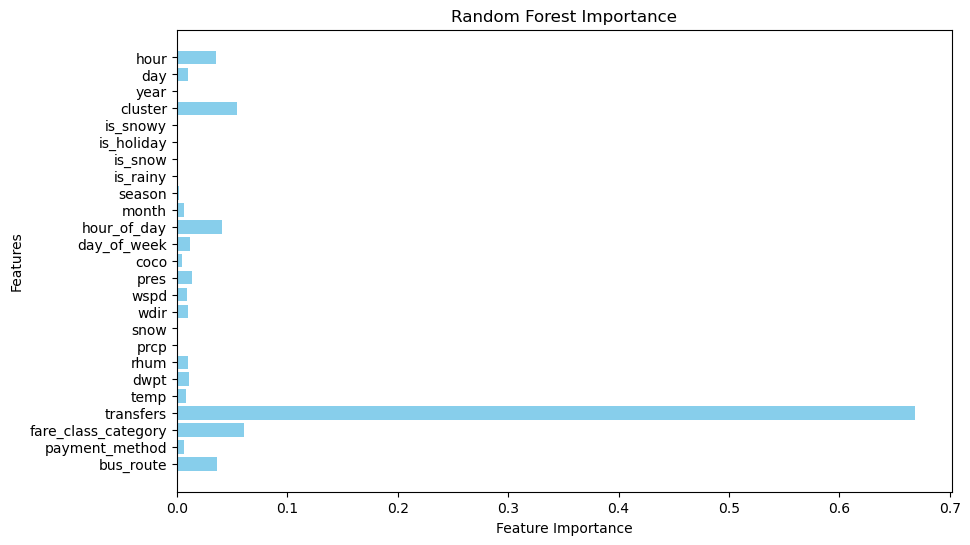

In [69]:
import matplotlib.pyplot as plt 

# Feature importance for Random Forest 
rf_importances = best_rf_model.feature_importances_
rf_features = X.columns

# Plotting Random Forest feature importances
plt.figure(figsize=(10,6))
plt.barh(rf_features, rf_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Importance")
plt.show()

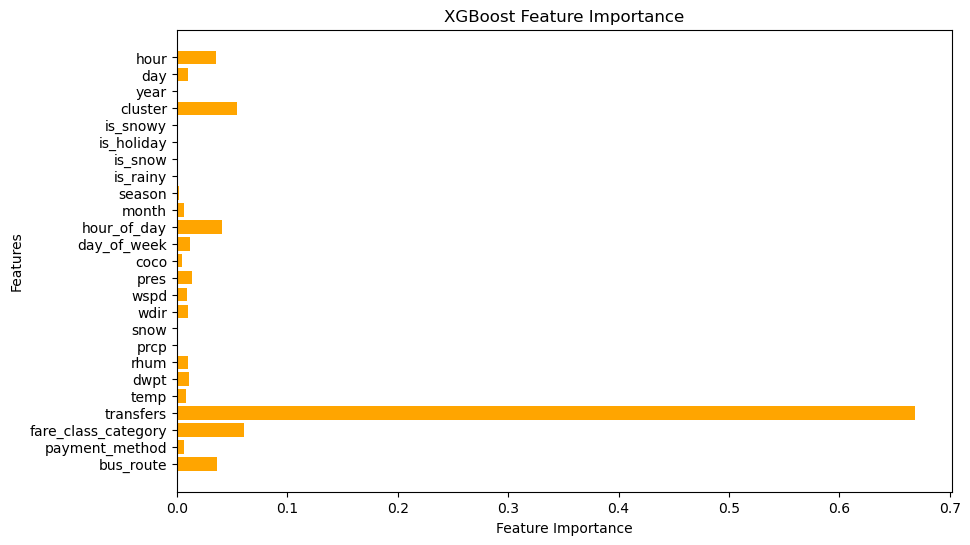

In [70]:
# Feature importance for Random Forest 
xgb_importances = best_rf_model.feature_importances_
xgb_features = X.columns

# Plotting Random Forest feature importances
plt.figure(figsize=(10,6))
plt.barh(xgb_features, xgb_importances, color='orange')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()

# Analyis of the two plots:
<ol>
    <li>Transfers: This feature is the most important for both models, dominating the predictions.</li>
    <li>Cluster: Shows moderate importance in both models, indicating that grouping similar routes provides useful predictive information.</li>
    <li>Hour of Day and Day of Week: These temporal features have minor but noticeable contributions, suggesting ridership varies by time.</li>
    <li>Other Features: Variables like weather, fare class, and bus route show minimal importance, indicating limited influence on ridership predictions.</li>
</ol>

# Deep Dive into Key Features: 

## Investigating Transfers and Clusters
<p>Transfers show the highest importance in both XGBoost and Random Forest so its crucial to analyze it. Here, I will calculate the correlation between <em>transfers</em> and <em>ridership</em> using Pearson method.</p>

In [74]:
import pandas as pd

correlation_spearman = merged_df['transfers'].corr(merged_df['ridership'], method='spearman')
print(f"Spearman Correlation (transfers vs ridership): {correlation_spearman}")

Spearman Correlation (transfers vs ridership): 0.6019607741025357


### The Spearman Correlation between <em>transfers</em> and <em>ridership</em> is 0.6019 indicating a modertate positive monotonic relationship. This suggests that as the number of transfers increases, the ridership generally increases as well, though the relationship is not strictly linear. 

## Visualizing the distribution of <em>transfers</em> and its relationship to <em>ridership</em>

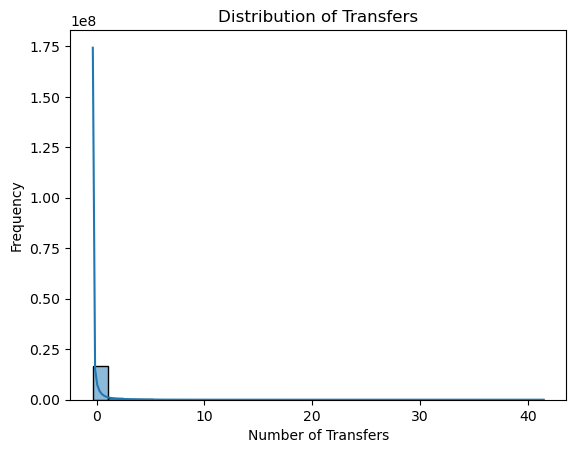

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of transfers
sns.histplot(merged_df['transfers'], bins=30, kde=True)
plt.title('Distribution of Transfers')
plt.xlabel('Number of Transfers')
plt.ylabel('Frequency')
plt.show()

### Analysis of the plot: 
<ol>
    <li>Skewness: The data is right-skewed, indicating that while a few observations have a high number of transfers, the majority are concentrated around zero.</li>
     <li>Insights in clustering: If <em>transfers</em> is used as a feature in clustering, it might donminate other features due to its skewness. I'm now going to apply log transformation to reduce the skewness.</li>
</ol>

## Applying log transformation to <em>transfers</em>

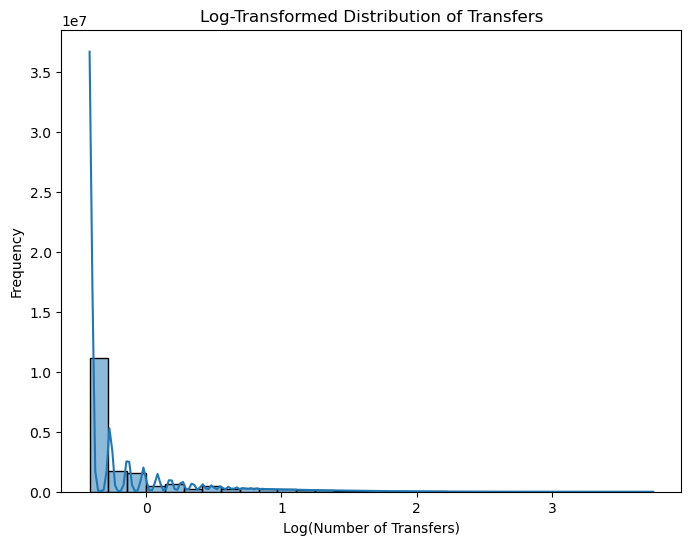

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Applying log transformation to 'transfers'
merged_df['log_transfers'] = np.log1p(merged_df['transfers'])

plt.figure(figsize=(8,6))
sns.histplot(merged_df['log_transfers'], kde=True, bins=30)
plt.title('Log-Transformed Distribution of Transfers')
plt.xlabel('Log(Number of Transfers)')
plt.ylabel('Frequency')
plt.show()

## Analysis of the plot
<ol>
    <li>The data is still heavily skewed, but the spread of values is improved compared to the plot prior.</li>
    <li>Why Skewness might remain: Many of the <em>transfers</em> values are likely concentrated near zero, leading to a prominent spike even after log transformation.</li>
</ol>

In [82]:
print(merged_df['log_transfers'].describe())

count    1.776543e+07
mean    -1.704617e-01
std      4.709931e-01
min     -4.176904e-01
25%     -4.176904e-01
50%     -4.176904e-01
75%     -1.357483e-01
max      3.748583e+00
Name: log_transfers, dtype: float64


### Key observations: 
<ol>
    <li>Count:1.77 million values, which indicates no missing data in the transformed column. </li>
    <li>Mean:-0.17- the log-transfromed values are centered slightly below zero.</li>
    <li>Standard Deviation :~0.47 — the spread is small, suggesting many values are slightly clustered</li>
    <li>Miniumum and 25th percentile: Both arte ~-0.42, which corresponds to log1p(0) where <em>transfers</em> = 0 </li>
    <li>Maximum:~3.75 — Indicates some higher values after transformed.</li>
    <li>Skewness: The clustering of values at a the lower end (25%=-0.42) and a long tail (max = 3.75) still suggest <strong>right-skewed data</strong>, although the transformation has helped spead the values.</li>
</ol>

In [84]:
# This is to check if the Log-Transformed data improves the correlation between log_transfers & ridership
from scipy.stats import spearmanr

spearman_corr, _ = spearmanr(merged_df['log_transfers'], merged_df['ridership'])
print(f"Spearman Correlation (Log-Transformed Transfers vs Ridership): {spearman_corr}")

Spearman Correlation (Log-Transformed Transfers vs Ridership): nan


In [85]:
# Checking for missing values and dropping if so..
print(merged_df[['log_transfers', 'ridership']].isnull().sum())

log_transfers    1
ridership        4
dtype: int64


In [86]:
merged_df = merged_df.dropna(subset=['log_transfers', 'ridership'])

In [87]:
print(merged_df['log_transfers'].nunique(), merged_df['ridership'].nunique())

109801 300817


In [88]:
# Recomputing the correlation
from scipy.stats import spearmanr

spearman_corr, _ = spearmanr(merged_df['log_transfers'], merged_df['ridership'])
print(f"Spearman Correlation (Log-Transformed Transfers vs Ridership): {spearman_corr}")

Spearman Correlation (Log-Transformed Transfers vs Ridership): 0.6019607741025357


In [89]:
### Now that the NaN issues were resolved, the spearman correlation between 
### the log-transformed trasfers and ridership is 0.60

### Visualizing the relationship between log_transfers and ridership

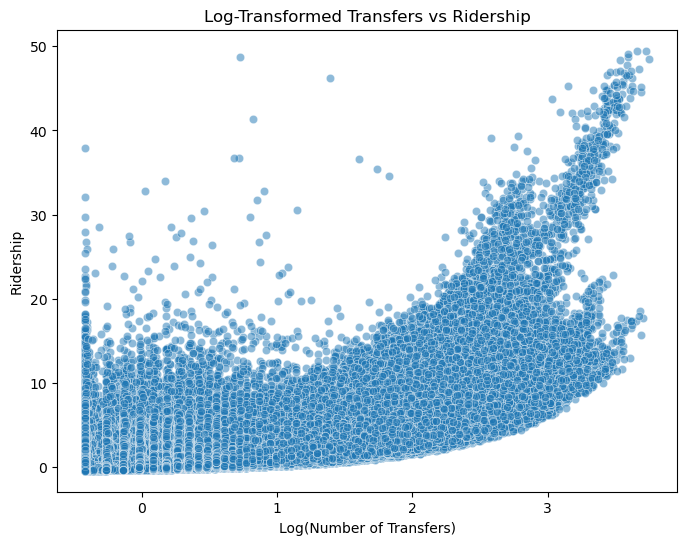

In [91]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='log_transfers', y='ridership', data=merged_df, alpha=0.5)
plt.title('Log-Transformed Transfers vs Ridership')
plt.xlabel('Log(Number of Transfers)')
plt.ylabel('Ridership')
plt.show()

# Analysis of the plot: 
<ul>
    <li>Monotonic Trend: The data shows an upward pattern, meaning the higher log-transformed transfers generally correspond to higher ridership values.</li>
    <li>Non-linear shape: The relationship is not perfecly linear but it follows an upward pattern.</li>
    <li>Concentration: There is a high density of data points at lower log-transformed tranfer values and ridership values, with some spread as the values increase.</li>
</ul>

# Regression Analysis
To perform regression modeling for the relationship between log-tranformed transfers and ridership, I'm going to use <strong>Linear Regression</strong> to assess its performance

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot

X = merged_df[['log_transfers']] 
y = merged_df['ridership']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Getting the model's parameters
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficient: 1.5537960054251303
Intercept: 0.26496251823312833


In [95]:
# Predicing the model
y_pred = model.predict(X_test)

In [96]:
# Calculating MSE and R-Squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)

Mean Squared Error: 0.461927589020752
R-Squared: 0.5358784483122917


## Visualizing the results:

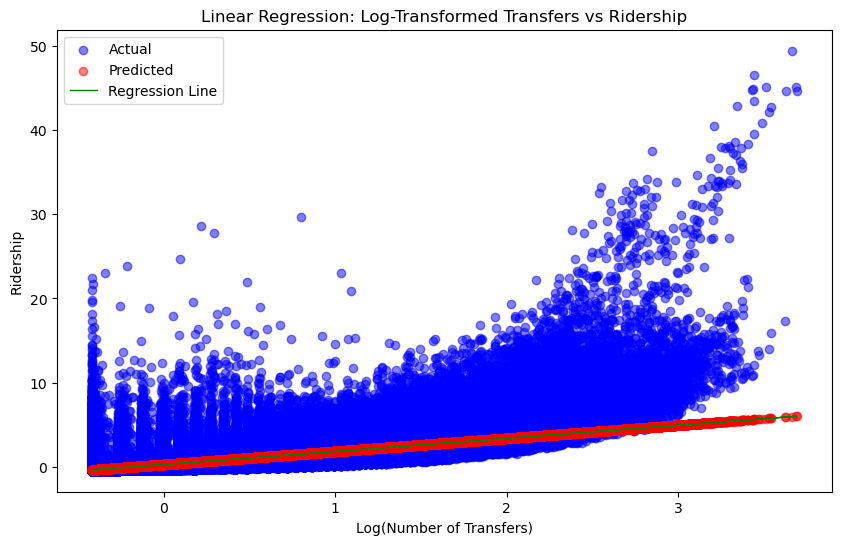

In [98]:
# Actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label="Predicted")
plt.plot(X_test, y_pred, color='green', linewidth=1, label="Regression Line")
plt.title("Linear Regression: Log-Transformed Transfers vs Ridership")
plt.xlabel("Log(Number of Transfers)")
plt.ylabel("Ridership")
plt.legend(loc='upper left')
plt.show()

# Observations of the plot:
<ol>
    <li>Actual Values: Are displayed in blue, spread across the plot with higher variance</li>
    <li>Predicted Values: Are displayed in red, aligning closely with the regression line but it appears to be flat compared to the actual data.</li>
    <li>Regression Line The green line showing the model's linear trend.</li>
</ol>
<p>Since the regression line seems to underfit the data, I'm going to consider trying <strong>Polynomial Regression</strong>, <strong>Random Forest</strong> and <strong>XGBoosting</strong> techniques to capture its curvature better.</p>

In [100]:
# Polynomial Regression

Polynomial Regression (Degree=2) - MSE: 0.3500, R²: 0.6483


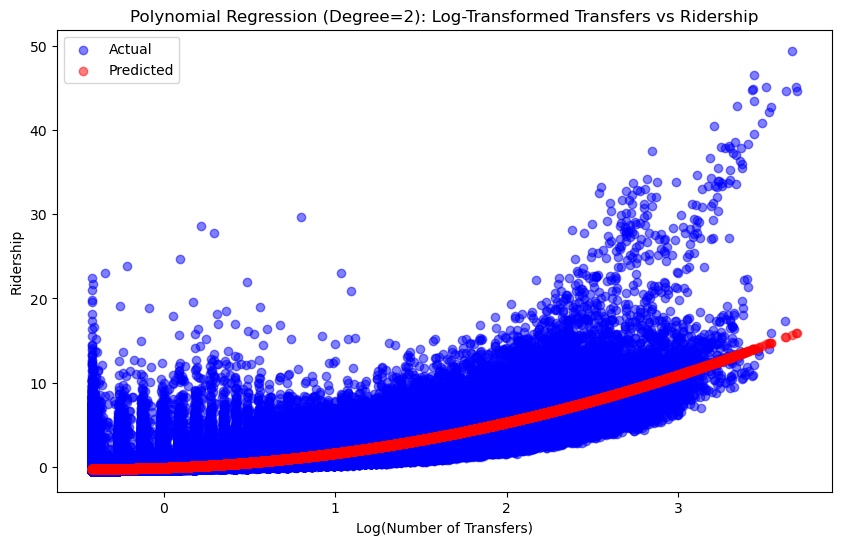

In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

degree = 2 
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


y_pred_poly = poly_model.predict(X_test_poly)


mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree={degree}) - MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
plt.scatter(X_test, y_pred_poly, color='red', alpha=0.5, label="Predicted")
plt.title(f"Polynomial Regression (Degree={degree}): Log-Transformed Transfers vs Ridership")
plt.xlabel("Log(Number of Transfers)")
plt.ylabel("Ridership")
plt.legend(loc='upper left')
plt.show()

In [102]:
# Random Forest 

Random Forest Regressor - MSE: 0.3306, R²: 0.6678


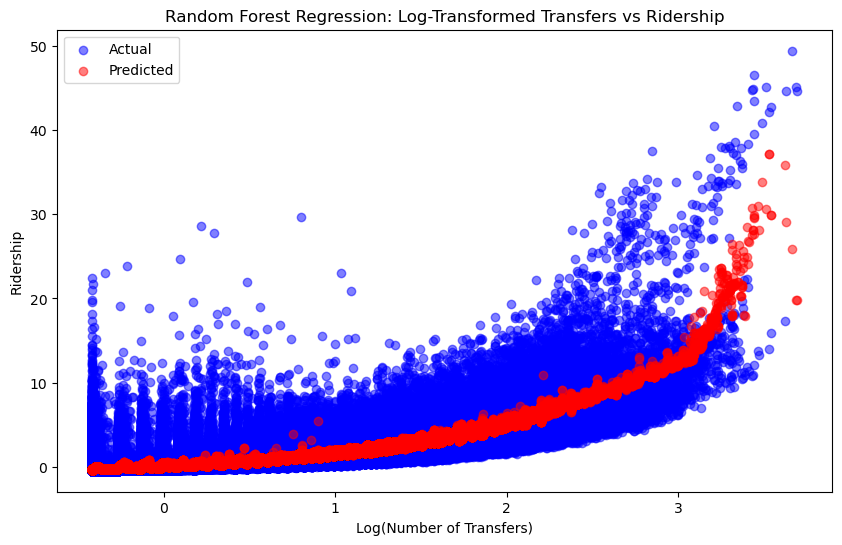

In [108]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
plt.scatter(X_test, y_pred_rf, color='red', alpha=0.5, label="Predicted")
plt.title("Random Forest Regression: Log-Transformed Transfers vs Ridership")
plt.xlabel("Log(Number of Transfers)")
plt.ylabel("Ridership")
plt.legend(loc='upper left')
plt.show()

In [110]:
# XGBoost

XGBoost Regressor - MSE: 0.3500, R²: 0.6483


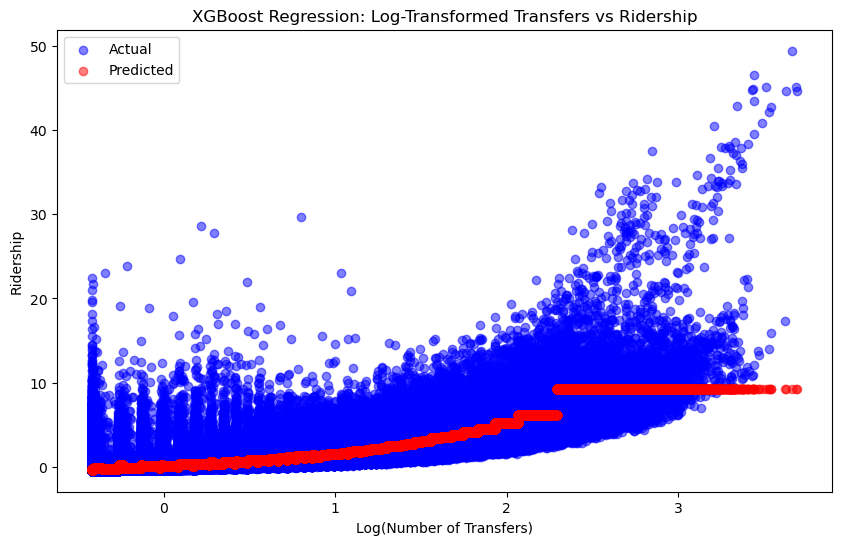

In [112]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=50, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)


mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor - MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
plt.scatter(X_test, y_pred_xgb, color='red', alpha=0.5, label="Predicted")
plt.title("XGBoost Regression: Log-Transformed Transfers vs Ridership")
plt.xlabel("Log(Number of Transfers)")
plt.ylabel("Ridership")
plt.legend(loc='upper left')
plt.show()

### Comparing Model performance using MSE and R2: 

In [115]:
print("Model Comparison:")
print(f"Polynomial Regression (Degree={degree}) - MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")
print(f"Random Forest Regressor - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")
print(f"XGboost Regressor - MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")

Model Comparison:
Polynomial Regression (Degree=2) - MSE: 0.3500, R²: 0.6483
Random Forest Regressor - MSE: 0.3306, R²: 0.6678
XGboost Regressor - MSE: 0.3500, R²: 0.6483
